###  [前準備①] MeCabサーバーは事前に起動させておくこと
https://github.com/abeja-inc/Platform_handson/tree/master/mecab_api

### [前準備②]下記リンクからデータをダウンロードして、展開ファイルを特定のチャンネルに配置しておくこと
https://drive.google.com/file/d/1qAQkntJqauXt3lL_8jXUiUJXeDA0qFgY/view?usp=sharing
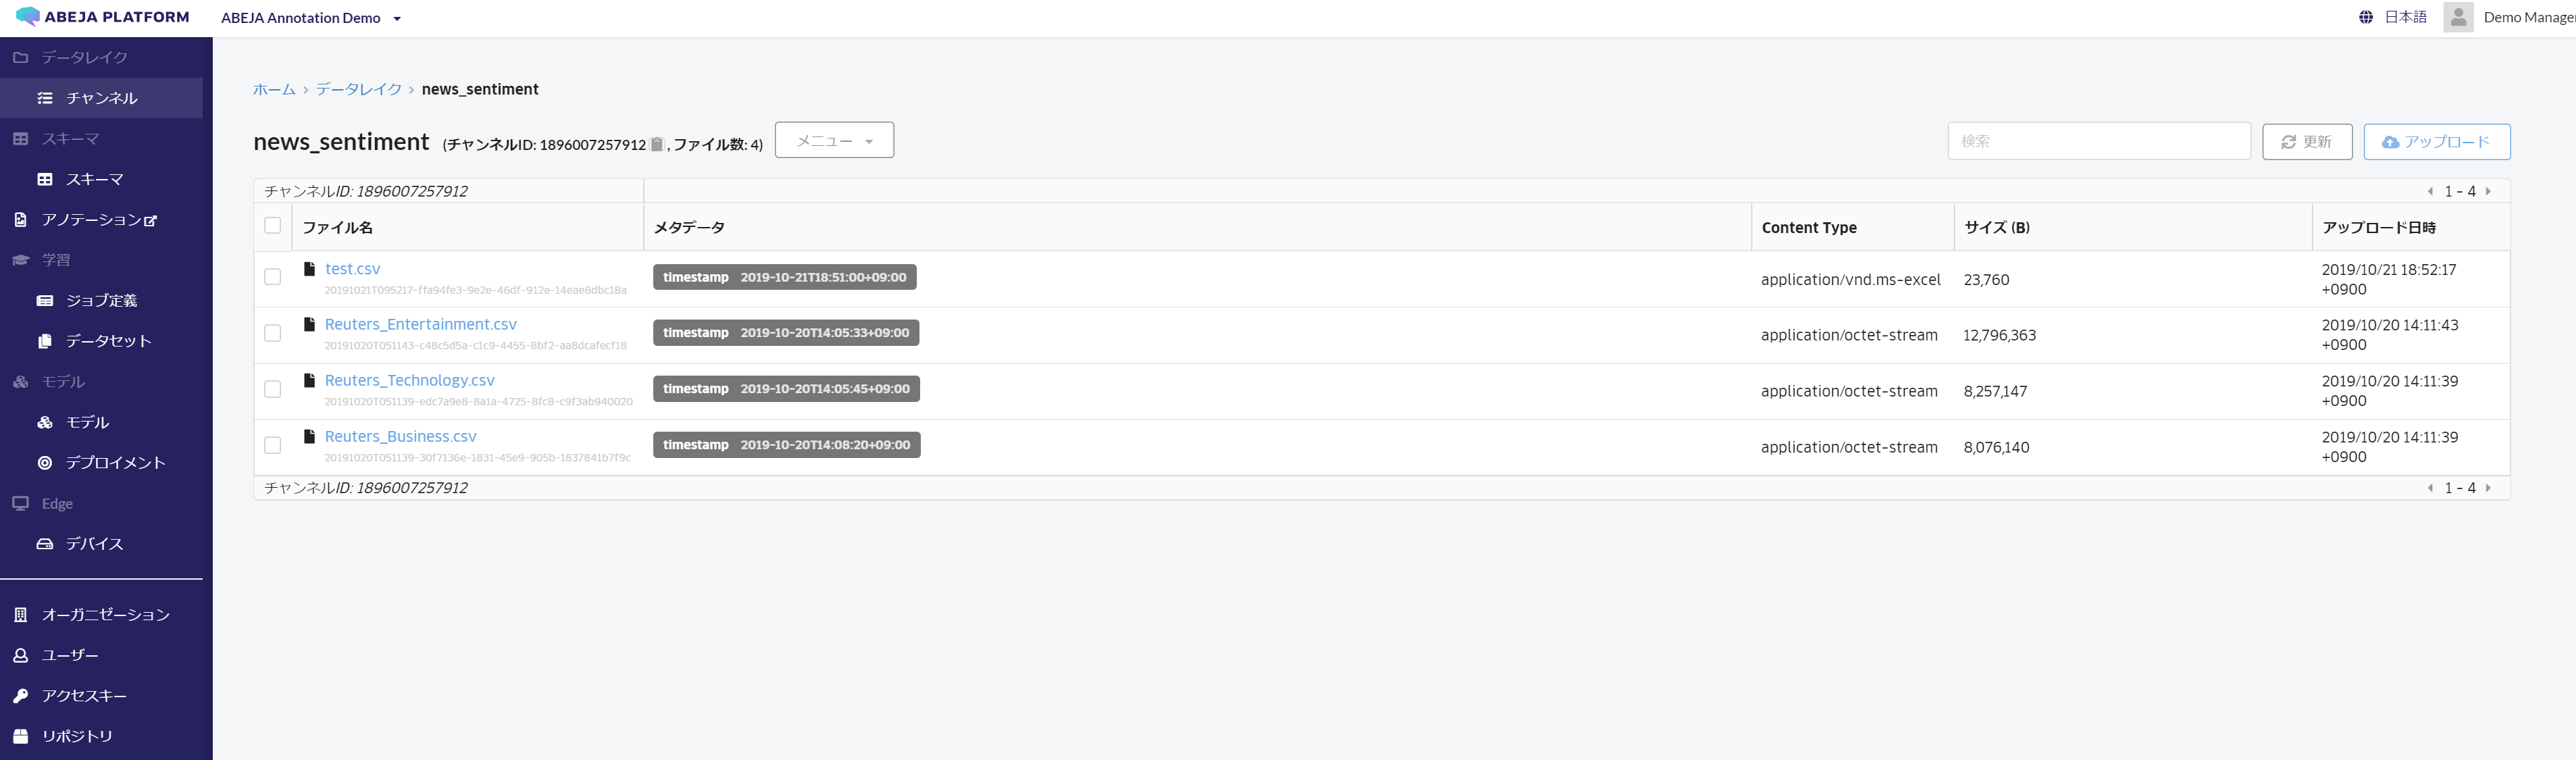

### [前準備③]ターミナルを立ち上げて、データをタウンロードしてみる
- `abeja config`コマンドを打って、クレデンシャル情報を設定する
- `abeja datalake download`コマンドを打って、`Reuters_Business.csv`をダウンロードしておくこと
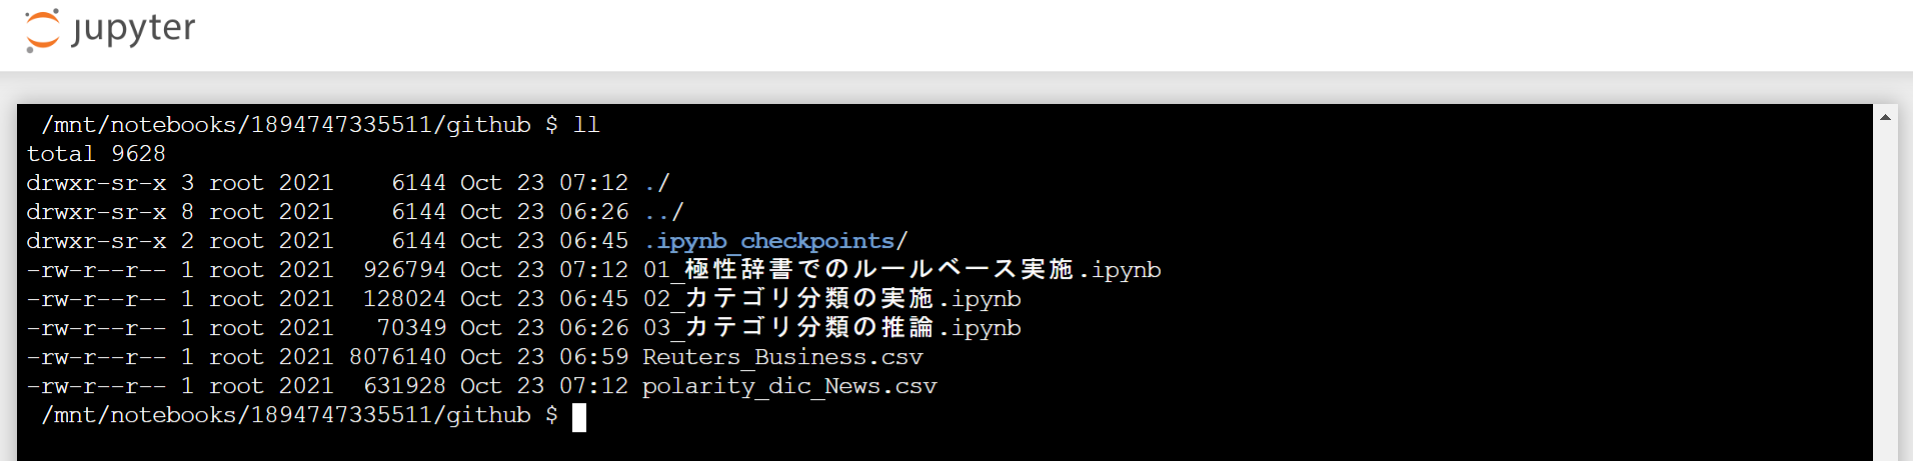

### [前準備④]極性辞書の配置
今回は下記から辞書のダウンロードを行い、配置する  
https://sites.google.com/socsim.org/izumi-lab/tools/%E9%87%91%E8%9E%8D%E5%B0%82%E9%96%80%E6%A5%B5%E6%80%A7%E8%BE%9E%E6%9B%B8?authuser=0

##### ※その他として、乾研などの極性辞書は有名（ちょうどライブラリ化もされてたのでお試しもあり）
https://qiita.com/yukinoi/items/46aa016d83bb0e64f598

## 極性辞書を使って文書の極性を出力する

In [10]:
import pandas as pd

In [11]:
# データ読み込み(ロイターからクローリングしたデータ)
with open("Reuters_Business.csv", "r", encoding="utf8") as f:
    text = f.readlines()

In [12]:
#行数確認
len(text)

3608

In [18]:
#Tag作成
tag = []
[tag.append(i+1) for i in range(len(text))]
tag

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [19]:
# list => dic
text_dict = dict(zip(tag,text))

In [20]:
text_dict[1]

'［東京\u3000９日\u3000ロイター］ - 三菱自動車(7211.T)は９日、アシュワニ・グプタ最高執行責任者（ＣＯＯ）が来年１月１日付で日産自動車(7201.T)のＣＯＯに就任する予定だと発表した。日産が発表したトップ人事を受け、グプタ氏の日産ＣＯＯ就任を受諾した。三菱自としての経営体制は「今後検討していく」としている。三菱自の益子修会長とグプタＣＯＯは同日、東京都内で記者団の取材に応じた。益子会長は今回の人事について、８日の日産取締役会終了後に同社から連絡があったことを明らかにし、グプタ氏が「どうしても必要という話があり、苦渋の決断だったが、日産に出さざるを得ない」と述べた。その上で「日産の一日も早い復活はアライアンスを組む三菱自にとってもプラス」と話した。グプタ氏の後任については「昨日の今日で何もまったく考えていない。具体的なアイデアが本日のところあるわけではない」と語った。グプタ氏は「日産、ルノー、三菱自の３社連合や多文化でのビジネスの経験をこれから生かしたい」との意向を示した。日産の専務執行役員で次期社長となる内田誠氏、次期副ＣＯＯの関潤氏とは「約１０年前に一緒に仕事をした経験がある。３人の力を活かし、どういうふうに（日産の業績を立て直すか）やっていくか議論していきたい」と述べた。＊内容を追加しました。白木真紀私たちの行動規範：トムソン・ロイター「信頼の原則」\n'

In [21]:
import json
text_json = json.dumps(text_dict, ensure_ascii=False)

In [22]:
# dic => json
text_json[1:1000]

'"1": "［東京\u3000９日\u3000ロイター］ - 三菱自動車(7211.T)は９日、アシュワニ・グプタ最高執行責任者（ＣＯＯ）が来年１月１日付で日産自動車(7201.T)のＣＯＯに就任する予定だと発表した。日産が発表したトップ人事を受け、グプタ氏の日産ＣＯＯ就任を受諾した。三菱自としての経営体制は「今後検討していく」としている。三菱自の益子修会長とグプタＣＯＯは同日、東京都内で記者団の取材に応じた。益子会長は今回の人事について、８日の日産取締役会終了後に同社から連絡があったことを明らかにし、グプタ氏が「どうしても必要という話があり、苦渋の決断だったが、日産に出さざるを得ない」と述べた。その上で「日産の一日も早い復活はアライアンスを組む三菱自にとってもプラス」と話した。グプタ氏の後任については「昨日の今日で何もまったく考えていない。具体的なアイデアが本日のところあるわけではない」と語った。グプタ氏は「日産、ルノー、三菱自の３社連合や多文化でのビジネスの経験をこれから生かしたい」との意向を示した。日産の専務執行役員で次期社長となる内田誠氏、次期副ＣＯＯの関潤氏とは「約１０年前に一緒に仕事をした経験がある。３人の力を活かし、どういうふうに（日産の業績を立て直すか）やっていくか議論していきたい」と述べた。＊内容を追加しました。白木真紀私たちの行動規範：トムソン・ロイター「信頼の原則」\\n", "2": "［ベルリン／フランクフルト\u3000９日\u3000ロイター］ - 欧州中央銀行（ＥＣＢ）のデギンドス副総裁は９日、金融緩和の副作用が顕在化していると発言、追加利下げのハードルは高いとの認識を示した。マーケット・ニュースとのインタビューで述べた。市場では、来年３月までに追加利下げがあるとの見方が浮上しているが、市場の期待に水を差す格好となった。副総裁は「（中銀預金金利の現行水準である）マイナス０．５０％は、現時点で適切な水準だと感じている。追加利下げについては、理事会内で徹底した良い議論が行われるだろう」と発言。「追加利下げは可能だが、金融政策の副作用が次から次に明らかになっており、次から次に顕在化している」と述べた。副総裁は、英国の強硬な欧州連合（ＥＵ）離脱や世界的な貿易摩擦の激化などがユーロ圏経済のリスクになると警告する一方、先月発表した量的緩和の再開

In [23]:
text_json = text_json.encode('utf-8')

In [24]:
# MeCabサーバーで立てた情報を入力する
import requests

# クレデンシャルの設定
mecab_url = "XXXXXXXXXXXXXXXXXXXXXXX"    #接続先のURL
user_id = "XXXXXXXX"    #ユーザーID
personal_access_token = "XXXXXXXXXXXXXX"   #アクセストークン

# Mecabの実行
auth = (user_id,personal_access_token)
response = requests.post(mecab_url, text_json,headers={'Content-Type': 'application/json; charset=UTF-8'}, auth=auth)

In [25]:
# 結果の成形
mecab_result = response.json().split("\t")

In [26]:
 mecab_result[0:10]

['［',
 '記号,括弧開,*,*,*,*,［,［,［\n東京',
 '名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー\n\u3000',
 '記号,空白,*,*,*,*,\u3000,\u3000,\u3000\n９',
 '名詞,数,*,*,*,*,９,キュウ,キュー\n日',
 '名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ\n\u3000',
 '記号,空白,*,*,*,*,\u3000,\u3000,\u3000\nロイター',
 '名詞,固有名詞,組織,*,*,*,ロイター,ロイター,ロイター\n］',
 '記号,括弧閉,*,*,*,*,］,］,］\n-',
 '記号,一般,*,*,*,*,*\n三菱自動車']

In [27]:
# 結果の成形（Sentenceの終了がEOSであるため）
sentence = response.json().split("EOS")

In [29]:
#極性辞書の読み込み
polarity_df = pd.read_csv("polarity_dic_News.csv")

In [30]:
polarity_df

,Unnamed: 0,word,score
0,0,絡む,-0.005009
1,1,労働生産性,-0.001821
2,2,文行,-0.008747
3,3,表される,0.000000
4,4,園,-0.019770
5,5,遂げる,0.007183
6,6,恐怖症,0.024039
7,7,上院,0.017038
8,8,下さない,0.005591
9,9,高見,-0.002597


In [31]:
# 試しに極性を当ててみる
for i in sentence:
    
    # スコアの初期設定とwordlist
    score = 0
    wordlist = []
    # データをセンテンスで分割
    word_list = i.split("\n")
    
    for j in word_list:
        detail_list = j.split(",")
        if j == "":         # センテンス末に空文字があるためスキップ
            pass
        elif detail_list[0].split("\t")[1] in ["形容詞", "動詞","名詞", "副詞"]:         # 特定の品詞のみ採用 
            if polarity_df[polarity_df["word"] == detail_list[6]].empty:
                pass
            else:
                polity_score = polarity_df[polarity_df["word"] == detail_list[6]]["score"].values[0]       # 極性辞書との突合
                score += polity_score
                wordlist.append(detail_list[6])
    print(score)
    break

0.4426024443687734


In [32]:
# ワードクラウドを見る
# フォントのダウンロード
!wget https://oscdl.ipa.go.jp/IPAexfont/ipaexg00401.zip

--2019-10-23 07:14:36--  https://oscdl.ipa.go.jp/IPAexfont/ipaexg00401.zip
Resolving oscdl.ipa.go.jp (oscdl.ipa.go.jp)... 192.218.88.241
Connecting to oscdl.ipa.go.jp (oscdl.ipa.go.jp)|192.218.88.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4166255 (4.0M) [application/zip]
Saving to: ‘ipaexg00401.zip’

ipaexg00401.zip     100%[===================>]   3.97M  1012KB/s    in 4.0s    

2019-10-23 07:14:40 (1022 KB/s) - ‘ipaexg00401.zip’ saved [4166255/4166255]



In [37]:
!apt-get update

Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic InRelease [242 kB]               
Get:1 https://packagecloud.io/abeja/stable/ubuntu bionic InRelease [23.3 kB]   
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 Packages [31.8 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:6 https://packagecloud.io/abeja/stable/ubuntu bionic/main amd64 Packages [559 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic/universe amd64 Packages [11.3 MB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]    
Get:11 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [5945 B]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [12.6 kB]
Get:13 h

In [38]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  unzip
0 upgraded, 1 newly installed, 0 to remove and 177 not upgraded.
Need to get 167 kB of archives.
After this operation, 558 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 unzip amd64 6.0-21ubuntu1 [167 kB]
Fetched 167 kB in 2s (111 kB/s) 
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
Selecting previously unselected package unzip.
(Reading database ... 76836 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-21ubuntu1_amd64.deb ...
Unpacking unzip (6.0-21ubuntu1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Setting up unzip (6.0-21ubuntu1) .

In [39]:
!unzip ipaexg00401.zip

Archive:  ipaexg00401.zip
   creating: ipaexg00401/
  inflating: ipaexg00401/ipaexg.ttf  
  inflating: ipaexg00401/IPA_Font_License_Agreement_v1.0.txt  
  inflating: ipaexg00401/Readme_ipaexg00401.txt  


In [41]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 33.8MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
from wordcloud import WordCloud
text = ' '.join(wordlist)
fpath = "./ipaexg00401/ipaexg.ttf"
wordcloud = WordCloud(background_color="white",font_path=fpath, width=800,height=400).generate(text)
wordcloud.to_file("./test.png")

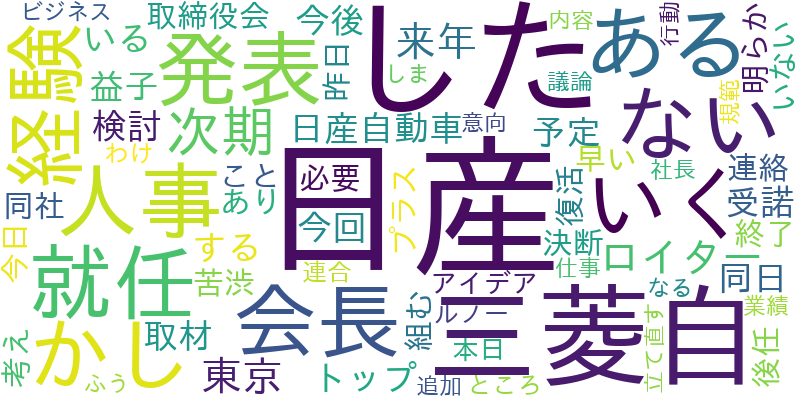

In [43]:
from IPython.display import Image, display_png
display_png(Image("test.png"))

In [71]:
# 東北乾研の極性辞書を使ったライブラリ
# 下記については、この環境にMecabのinstallが必要
import oseti
import MeCab
analyzer = oseti.Analyzer()
analyzer.analyze('明日の天気は良いものになるだろう')

[1.0]

# Sentence1

In [44]:
text_dict[1]

'［東京\u3000９日\u3000ロイター］ - 三菱自動車(7211.T)は９日、アシュワニ・グプタ最高執行責任者（ＣＯＯ）が来年１月１日付で日産自動車(7201.T)のＣＯＯに就任する予定だと発表した。日産が発表したトップ人事を受け、グプタ氏の日産ＣＯＯ就任を受諾した。三菱自としての経営体制は「今後検討していく」としている。三菱自の益子修会長とグプタＣＯＯは同日、東京都内で記者団の取材に応じた。益子会長は今回の人事について、８日の日産取締役会終了後に同社から連絡があったことを明らかにし、グプタ氏が「どうしても必要という話があり、苦渋の決断だったが、日産に出さざるを得ない」と述べた。その上で「日産の一日も早い復活はアライアンスを組む三菱自にとってもプラス」と話した。グプタ氏の後任については「昨日の今日で何もまったく考えていない。具体的なアイデアが本日のところあるわけではない」と語った。グプタ氏は「日産、ルノー、三菱自の３社連合や多文化でのビジネスの経験をこれから生かしたい」との意向を示した。日産の専務執行役員で次期社長となる内田誠氏、次期副ＣＯＯの関潤氏とは「約１０年前に一緒に仕事をした経験がある。３人の力を活かし、どういうふうに（日産の業績を立て直すか）やっていくか議論していきたい」と述べた。＊内容を追加しました。白木真紀私たちの行動規範：トムソン・ロイター「信頼の原則」\n'

In [46]:
# 東大 和泉研
# スコアの初期設定とwordlist
score = 0

# データをセンテンスで分割
word_list = sentence[0].split("\n")

for j in word_list:
    detail_list = j.split(",")
    if j == "":         # センテンス末に空文字があるためスキップ
        pass
    elif detail_list[0].split("\t")[1] in ["形容詞", "動詞","名詞", "副詞"]:         # 特定の品詞のみ採用 
        if polarity_df[polarity_df["word"] == detail_list[6]].empty:
            pass
        else:
            polity_score = polarity_df[polarity_df["word"] == detail_list[6]]["score"].values[0]       # 極性辞書との突合
            score += polity_score
            wordlist.append(detail_list[6])
print(score)

0.4426024443687734


# sentence2

In [47]:
text_dict[2]

'［ベルリン／フランクフルト\u3000９日\u3000ロイター］ - 欧州中央銀行（ＥＣＢ）のデギンドス副総裁は９日、金融緩和の副作用が顕在化していると発言、追加利下げのハードルは高いとの認識を示した。マーケット・ニュースとのインタビューで述べた。市場では、来年３月までに追加利下げがあるとの見方が浮上しているが、市場の期待に水を差す格好となった。副総裁は「（中銀預金金利の現行水準である）マイナス０．５０％は、現時点で適切な水準だと感じている。追加利下げについては、理事会内で徹底した良い議論が行われるだろう」と発言。「追加利下げは可能だが、金融政策の副作用が次から次に明らかになっており、次から次に顕在化している」と述べた。副総裁は、英国の強硬な欧州連合（ＥＵ）離脱や世界的な貿易摩擦の激化などがユーロ圏経済のリスクになると警告する一方、先月発表した量的緩和の再開など、包括的な金融緩和策を急いで変更する必要はないとの認識を示した。量的緩和の再開に対しては、ドイツやオランダなどから批判が出ているが、副総裁はあまり騒ぎ立てるべきではないと主張。来月１日にラガルド新総裁が就任しても、ＥＣＢが政策を１８０度転換することはないと述べた。私たちの行動規範：トムソン・ロイター「信頼の原則」\n'

In [48]:
# 東大 和泉研
# スコアの初期設定とwordlist
score = 0

# データをセンテンスで分割
word_list = sentence[1].split("\n")

for j in word_list:
    detail_list = j.split(",")
    if j == "":         # センテンス末に空文字があるためスキップ
        pass
    elif detail_list[0].split("\t")[1] in ["形容詞", "動詞","名詞", "副詞"]:         # 特定の品詞のみ採用 
        if polarity_df[polarity_df["word"] == detail_list[6]].empty:
            pass
        else:
            polity_score = polarity_df[polarity_df["word"] == detail_list[6]]["score"].values[0]       # 極性辞書との突合
            score += polity_score
            wordlist.append(detail_list[6])
            #print(detail_list[0].split("\t")[0])
print(score)

-0.8831506649508861


# sentence3

In [49]:
text_dict[3]

'［北京\u3000９日\u3000ロイター］ - 米プロバスケットボール（ＮＢＡ）のヒューストン・ロケッツの幹部が香港の抗議デモを応援する内容をツイッターに投稿した問題を巡り、中国のインターネットサービス大手の騰訊控股（テンセント・ホールディングス）(0700.HK)がＮＢＡの試合の配信を一時停止したことを受け、一部ファンが契約料の返還をテンセントに要求した。テンセントは７月にＮＢＡとの独占提携を更新し、５億人のファンがいるとされる中国でＮＢＡの試合をストリーミング配信する権利を確保した。しかし、ロケッツの幹部による香港の抗議デモを応援する投稿に、中国で反発が広がり、テンセントは前週末にロケッツの試合を一時配信停止すると発表した。その後、ＮＢＡのコミッショナーが選手や関係者の表現の自由を尊重する姿勢を示すと、プレシーズンの全試合の配信を停止すると発表した。[nL3N26U11D]テンセントによると、ロケッツの試合を視聴している契約者は他チームの試合に切り替えるか、返金を申請することができる。ロケッツ幹部の投稿に中国では波紋が広がり、国営テレビの中国中央電視台（ＣＣＴＶ）が中国で行われるエキシビジョンゲームの放映を取りやめたほか、企業がスポンサー契約などを見直す動きもでている。私たちの行動規範：トムソン・ロイター「信頼の原則」\n'

In [50]:
# 東大 和泉研
# スコアの初期設定とwordlist
score = 0

# データをセンテンスで分割
word_list = sentence[2].split("\n")

for j in word_list:
    detail_list = j.split(",")
    if j == "":         # センテンス末に空文字があるためスキップ
        pass
    elif detail_list[0].split("\t")[1] in ["形容詞", "動詞","名詞", "副詞"]:         # 特定の品詞のみ採用 
        if polarity_df[polarity_df["word"] == detail_list[6]].empty:
            pass
        else:
            polity_score = polarity_df[polarity_df["word"] == detail_list[6]]["score"].values[0]       # 極性辞書との突合
            score += polity_score
            wordlist.append(detail_list[6])
            #print(detail_list[0].split("\t")[0])
print(score)

1.1587851082803355


# setence4

In [51]:
text_dict[4]

'［ベルリン\u3000９日\u3000ロイター］ - ドイツのショルツ財務相は９日、１０月末に退任する欧州中央銀行（ＥＣＢ）のラウテンシュレーガー専務理事の後任について、「男性のみは良くない」と民放テレビに語り、女性が望ましいとの考えを示唆した。ＥＣＢは９月、専務理事で唯一の女性であるラウテンシュレーガー氏が任期途中の１０月末をもって退任すると発表した。ショルツ氏は、後任候補についてはコメントを差し控えたものの、後任人事は「非常に速く」対処されるとの見方を示した。私たちの行動規範：トムソン・ロイター「信頼の原則」\n'

In [52]:
# 東大 和泉研
# スコアの初期設定とwordlist
score = 0

# データをセンテンスで分割
word_list = sentence[3].split("\n")

for j in word_list:
    detail_list = j.split(",")
    if j == "":         # センテンス末に空文字があるためスキップ
        pass
    elif detail_list[0].split("\t")[1] in ["形容詞", "動詞","名詞", "副詞"]:         # 特定の品詞のみ採用 
        if polarity_df[polarity_df["word"] == detail_list[6]].empty:
            pass
        else:
            polity_score = polarity_df[polarity_df["word"] == detail_list[6]]["score"].values[0]       # 極性辞書との突合
            score += polity_score
            wordlist.append(detail_list[6])
            #print(detail_list[0].split("\t")[0])
print(score)

0.20747865931484005


# sentnce5

In [53]:
text_dict[5]

'■レートは終値（前日比または前週末比）、安値─高値＜外為市場＞ドル／円JPY= ユーロ／ドルEUR= ユーロ／円EURJPY=午後5時現在 107.20/22 1.0976/80 117.68/72NY午後5時 107.07/10 1.0954/58 117.31/35午後５時のドル／円は、前日ニューヨーク市場午後５時時点に比べてややドル高／円安の１０７円前半。市場の関心は１０日から始まる閣僚級の米中通商交渉の行方に注がれているが、足元で米国が中国による人権弾圧を問題視して措置を講じていることもあり、警戒感が広がっている。＜株式市場＞日経平均 21456.38円 (131.40円安)安値─高値\u3000\u3000 21359.84円─21467.77円東証出来高 10億4524万株東証売買代金 1兆8035億円東京株式市場で日経平均株価は反落した。前日の米国株式市場では、米中摩擦を巡るネガティブなニュースが嫌気され主要３指数が大幅安となった。東京市場でも朝方から半導体や輸出関連株をはじめとする幅広い業種で売りが先行した。その後は為替が安定したこともあり、小幅に下げ幅を縮小し取引を終えた。東証１部騰落数は、値上がり１０７０銘柄に対し、値下がりが９８２銘柄、変わらずが１０１銘柄だった。＜短期金融市場＞\u300017時05分現在無担保コール翌日物金利(速報ベース) -0.012％ユーロ円金先（20年3月限） 100.055 (-0.005)安値─高値 100.055─100.0603カ月物ＴＢ -0.364 (+0.004)安値─高値 -0.364─-0.364無担保コール翌日物の加重平均レートは、速報ベースでマイナス０．０１２％になった。前営業日からは横ばいとなる。「引き続き資金不足状態が続いており、調達意欲が強い」（国内金融機関）という。ユーロ円３カ月金利先物は動意薄。＜円債市場＞国債先物・19年12月限 155.02 (+0.07)安値─高値 154.99─155.1510年長期金利(日本相互証券引け値) -0.210％ (-0.005)安値─高値 -0.215─-0.220％国債先物中心限月１２月限は前営業日比７銭高の１５５円０２銭と反発して取引を終えた。米国政府が中国当局者に対しビザ規制を課したことなどから米中通商交渉への警戒感が再び高まったが、上値も重

In [54]:
# 東大 和泉研
# スコアの初期設定とwordlist
score = 0

# データをセンテンスで分割
word_list = sentence[4].split("\n")

for j in word_list:
    detail_list = j.split(",")
    if j == "":         # センテンス末に空文字があるためスキップ
        pass
    elif detail_list[0].split("\t")[1] in ["形容詞", "動詞","名詞", "副詞"]:         # 特定の品詞のみ採用 
        if polarity_df[polarity_df["word"] == detail_list[6]].empty:
            pass
        else:
            polity_score = polarity_df[polarity_df["word"] == detail_list[6]]["score"].values[0]       # 極性辞書との突合
            score += polity_score
            wordlist.append(detail_list[6])
            #print(detail_list[0].split("\t")[0])
print(score)

-1.5673893295345998


# sentence6

In [55]:
text_dict[6]

'［上海\u3000９日\u3000ロイター］ - 中国の監視カメラ大手、杭州海康威視数字技術（ハイクビジョン）(002415.SZ)は９日、米政府から禁輸対象に指定されたことで短期的な悪影響を受ける可能性があるとの見方を示した。米商務省は７日、中国政府がウイグル族などイスラム系少数民族を弾圧しているとして、ハイクビジョンなど企業８社、ならびに公安当局など２０の機関について、部品の調達など米国企業との取引を原則禁止するエンティティー・リスト（ＥＬ）に追加した。[nL3N26S3WT]ハイクビジョンの幹部は会見で、米国のブラックリスト入りを想定した準備を２年前から進め、米国製部品への依存を減らしていたとし、長期的な見通しには自信を示した。監視カメラ関連のリサーチ会社ＩＰＶＭの創業者ジョン・ホノビッチ氏は、ハイクビジョンがインテル(INTC.O)、エヌビディア(NVDA.O)、アンバレラ(AMBA.O)、ウエスタンデジタル(WDC.O)、シーゲイト・テクノロジー(STX.O)から半導体を調達していると指摘している。私たちの行動規範：トムソン・ロイター「信頼の原則」\n'

In [56]:
# 東大 和泉研
# スコアの初期設定とwordlist
score = 0

# データをセンテンスで分割
word_list = sentence[5].split("\n")

for j in word_list:
    detail_list = j.split(",")
    if j == "":         # センテンス末に空文字があるためスキップ
        pass
    elif detail_list[0].split("\t")[1] in ["形容詞", "動詞","名詞", "副詞"]:         # 特定の品詞のみ採用 
        if polarity_df[polarity_df["word"] == detail_list[6]].empty:
            pass
        else:
            polity_score = polarity_df[polarity_df["word"] == detail_list[6]]["score"].values[0]       # 極性辞書との突合
            score += polity_score
            wordlist.append(detail_list[6])
            #print(detail_list[0].split("\t")[0])
print(score)

0.35627936669304994
